In [1]:
import numpy as np
import matplotlib.pyplot as plt

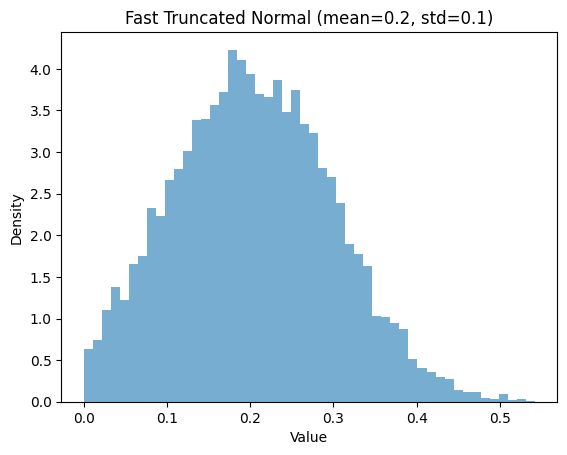

實際標準差: 0.09455881576929706


In [2]:
def fast_truncated_normal(mean, std, low, high, size):
    result = []
    while len(result) < size:
        samples = np.random.normal(loc=mean, scale=std, size=size)
        accepted = samples[(samples >= low) & (samples <= high)]
        result.extend(accepted)
    return np.array(result[:size])  # 裁切到精確大小

a, b = 0, 1     # 截斷範圍
mean = 0.2
std = 0.1
size = 10000

data = fast_truncated_normal(mean, std, a, b, size)

# 繪圖
plt.hist(data, bins=50, density=True, alpha=0.6)
plt.title(f"Fast Truncated Normal (mean={mean}, std={std})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# 標準差
print("實際標準差:", np.std(data))


In [3]:
def truncated_normal_sample(mean, std, low, high):
    while True:
        x = np.random.normal(mean, std)
        if low <= x <= high:
            return x
        
sample = truncated_normal_sample(mean=0.1, std=0.2, low=0, high=1)
print("Sample:", sample)

Sample: 0.02727069161692755


In [6]:
# 1. 參數設定
u1, sigma = 0.1, 0.1        # 每 bit 的平均 delay = 0.1, sigma = 0.1
td = 5                      # 固定的 clock period (threshold)
num_trials = 100000        # Monte Carlo 模擬次數

# 2. 針對不同 n 模擬錯誤率
n_values = list(range(4, 65))  # 模擬 4 ~ 64 bits
err_probs_list_td_5 = []

for n in n_values:
    bits = 0
    errors = 0
    err_probs = 0.0
    for _ in range(num_trials):
        total_delay = 0
        for bits in range(n):
            carry_delay = truncated_normal_sample(mean=u1, std=sigma, low=0, high=1)
            total_delay = total_delay + carry_delay
            
        ## 若 total_delay > td，視為錯誤
        if total_delay > td:
            errors += 1
            
    err_probs = errors / num_trials
    err_probs_list_td_5.append(err_probs)
    print(f"n= {n} bits: error rate ≈ {err_probs:.5f}")

n= 4 bits: error rate ≈ 0.00000
n= 5 bits: error rate ≈ 0.00000
n= 6 bits: error rate ≈ 0.00000
n= 7 bits: error rate ≈ 0.00000
n= 8 bits: error rate ≈ 0.00000
n= 9 bits: error rate ≈ 0.00000
n= 10 bits: error rate ≈ 0.00000
n= 11 bits: error rate ≈ 0.00000
n= 12 bits: error rate ≈ 0.00000
n= 13 bits: error rate ≈ 0.00000
n= 14 bits: error rate ≈ 0.00000
n= 15 bits: error rate ≈ 0.00000
n= 16 bits: error rate ≈ 0.00000
n= 17 bits: error rate ≈ 0.00000
n= 18 bits: error rate ≈ 0.00000
n= 19 bits: error rate ≈ 0.00000
n= 20 bits: error rate ≈ 0.00000
n= 21 bits: error rate ≈ 0.00000
n= 22 bits: error rate ≈ 0.00000
n= 23 bits: error rate ≈ 0.00000
n= 24 bits: error rate ≈ 0.00000
n= 25 bits: error rate ≈ 0.00001
n= 26 bits: error rate ≈ 0.00009
n= 27 bits: error rate ≈ 0.00028
n= 28 bits: error rate ≈ 0.00069
n= 29 bits: error rate ≈ 0.00230
n= 30 bits: error rate ≈ 0.00506
n= 31 bits: error rate ≈ 0.01358
n= 32 bits: error rate ≈ 0.02827
n= 33 bits: error rate ≈ 0.05224
n= 34 bits: erro

In [7]:
# 1. 參數設定
u1, sigma = 0.1, 0.1        # 每 bit 的平均 delay = 0.1, sigma = 0.1
td = 6                      # 固定的 clock period (threshold)
num_trials = 100000         # Monte Carlo 模擬次數

# 2. 針對不同 n 模擬錯誤率
n_values = list(range(4, 65))  # 模擬 4 ~ 64 bits
err_probs_list_td_6 = []

for n in n_values:
    bits = 0
    errors = 0
    err_probs = 0.0
    for _ in range(num_trials):
        total_delay = 0
        for bits in range(n):
            carry_delay = truncated_normal_sample(mean=u1, std=sigma, low=0, high=1)
            total_delay = total_delay + carry_delay
            
        ## 若 total_delay > td，視為錯誤
        if total_delay > td:
            errors += 1
            
    err_probs = errors / num_trials
    err_probs_list_td_6.append(err_probs)
    print(f"n= {n} bits: error rate ≈ {err_probs:.5f}")

n= 4 bits: error rate ≈ 0.00000
n= 5 bits: error rate ≈ 0.00000
n= 6 bits: error rate ≈ 0.00000
n= 7 bits: error rate ≈ 0.00000
n= 8 bits: error rate ≈ 0.00000
n= 9 bits: error rate ≈ 0.00000
n= 10 bits: error rate ≈ 0.00000
n= 11 bits: error rate ≈ 0.00000
n= 12 bits: error rate ≈ 0.00000
n= 13 bits: error rate ≈ 0.00000
n= 14 bits: error rate ≈ 0.00000
n= 15 bits: error rate ≈ 0.00000
n= 16 bits: error rate ≈ 0.00000
n= 17 bits: error rate ≈ 0.00000
n= 18 bits: error rate ≈ 0.00000
n= 19 bits: error rate ≈ 0.00000
n= 20 bits: error rate ≈ 0.00000
n= 21 bits: error rate ≈ 0.00000
n= 22 bits: error rate ≈ 0.00000
n= 23 bits: error rate ≈ 0.00000
n= 24 bits: error rate ≈ 0.00000
n= 25 bits: error rate ≈ 0.00000
n= 26 bits: error rate ≈ 0.00000
n= 27 bits: error rate ≈ 0.00000
n= 28 bits: error rate ≈ 0.00000
n= 29 bits: error rate ≈ 0.00000
n= 30 bits: error rate ≈ 0.00000
n= 31 bits: error rate ≈ 0.00001
n= 32 bits: error rate ≈ 0.00002
n= 33 bits: error rate ≈ 0.00017
n= 34 bits: erro

In [22]:
# 1. 參數設定
u1, sigma = 0.1, 0.1        # 每 bit 的平均 delay = 0.1, sigma = 0.1
td = 7                      # 固定的 clock period (threshold)
num_trials = 100000         # Monte Carlo 模擬次數

# 2. 針對不同 n 模擬錯誤率
n_values = list(range(4, 65))  # 模擬 4 ~ 64 bits
err_probs_list_td_7 = []

for n in n_values:
    bits = 0
    errors = 0
    err_probs = 0.0
    for _ in range(num_trials):
        total_delay = 0
        for bits in range(n):
            carry_delay = truncated_normal_sample(mean=u1, std=sigma, low=0, high=1)
            total_delay = total_delay + carry_delay
            
        ## 若 total_delay > td，視為錯誤
        if total_delay > td:
            errors += 1
            
    err_probs = errors / num_trials
    err_probs_list_td_7.append(err_probs)
    print(f"n= {n} bits: error rate ≈ {err_probs:.5f}")

n= 4 bits: error rate ≈ 0.00000
n= 5 bits: error rate ≈ 0.00000
n= 6 bits: error rate ≈ 0.00000
n= 7 bits: error rate ≈ 0.00000
n= 8 bits: error rate ≈ 0.00000
n= 9 bits: error rate ≈ 0.00000
n= 10 bits: error rate ≈ 0.00000
n= 11 bits: error rate ≈ 0.00000
n= 12 bits: error rate ≈ 0.00000
n= 13 bits: error rate ≈ 0.00000
n= 14 bits: error rate ≈ 0.00000
n= 15 bits: error rate ≈ 0.00000
n= 16 bits: error rate ≈ 0.00000
n= 17 bits: error rate ≈ 0.00000
n= 18 bits: error rate ≈ 0.00000
n= 19 bits: error rate ≈ 0.00000
n= 20 bits: error rate ≈ 0.00000
n= 21 bits: error rate ≈ 0.00000
n= 22 bits: error rate ≈ 0.00000
n= 23 bits: error rate ≈ 0.00000
n= 24 bits: error rate ≈ 0.00000
n= 25 bits: error rate ≈ 0.00000
n= 26 bits: error rate ≈ 0.00000
n= 27 bits: error rate ≈ 0.00000
n= 28 bits: error rate ≈ 0.00000
n= 29 bits: error rate ≈ 0.00000
n= 30 bits: error rate ≈ 0.00000
n= 31 bits: error rate ≈ 0.00000
n= 32 bits: error rate ≈ 0.00000
n= 33 bits: error rate ≈ 0.00000
n= 34 bits: erro

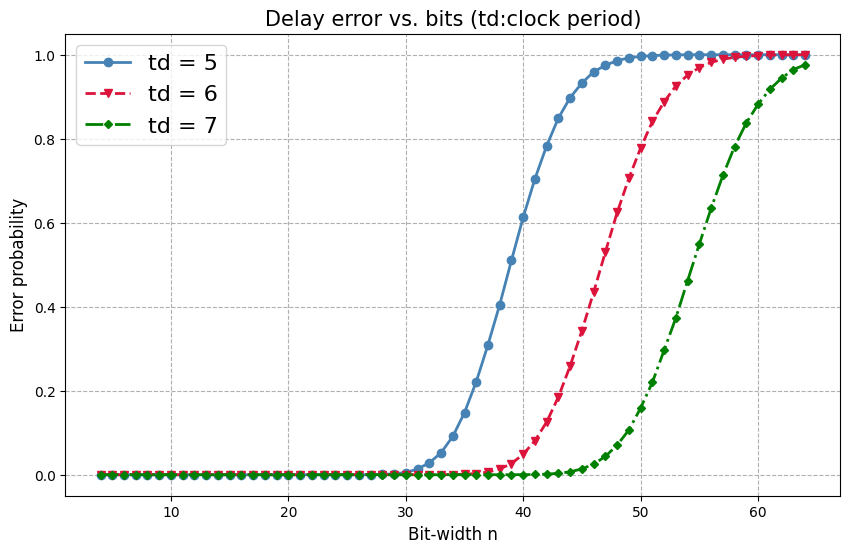

In [38]:
# 3. 畫圖
plt.figure(figsize=(10,6))
plt.plot(n_values, err_probs_list_td_5, marker='o', linestyle='-', color='#4682B4', label='td = 5', markersize=6,linewidth=2)
plt.plot(n_values, err_probs_list_td_6, marker='v', linestyle='--', color='#DC143C', label='td = 6', markersize=6,linewidth=2)
plt.plot(n_values, err_probs_list_td_7, marker='D', linestyle='-.', color='#008000', label='td = 7', markersize=4, linewidth=2)
plt.xlabel('Bit-width n', fontsize=12)
plt.ylabel('Error probability', fontsize=12)

# 設定圖例字體大小
plt.legend(fontsize=16)
plt.title('Delay error vs. bits (td:clock period)', fontsize=15)
plt.grid(True, which="both", ls="--")
plt.savefig("AWE_Rate vs bits (64bits)")
plt.show()

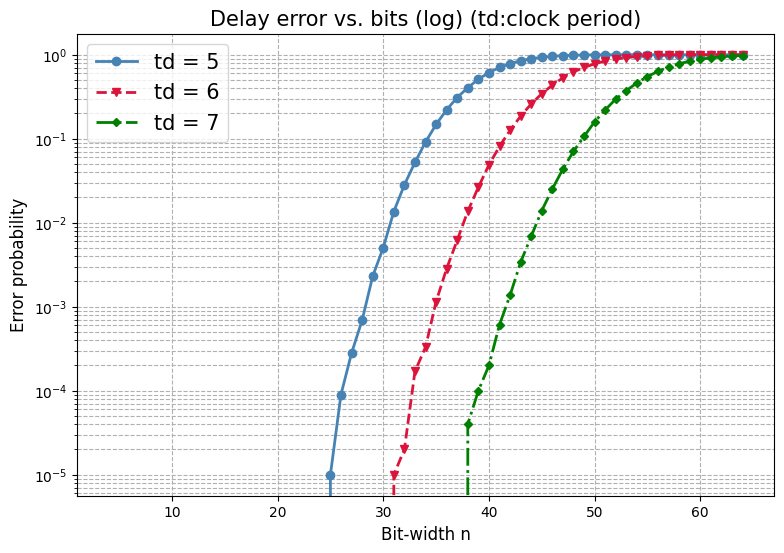

In [39]:
# 3. 畫圖
plt.figure(figsize=(9,6))
plt.plot(n_values, err_probs_list_td_5, marker='o', linestyle='-', color='#4682B4',label='td = 5', markersize=6, linewidth=2)
plt.plot(n_values, err_probs_list_td_6, marker='v', linestyle='--', color='#DC143C',label='td = 6', markersize=6, linewidth=2)
plt.plot(n_values, err_probs_list_td_7, marker='D', linestyle='-.', color='#008000', label='td = 7', markersize=4, linewidth=2)
plt.yscale('log')
plt.xlabel('Bit-width n', fontsize=12)
plt.ylabel('Error probability', fontsize=12)

# 設定圖例字體大小
plt.legend(fontsize=15)
plt.title('Delay error vs. bits (log) (td:clock period)', fontsize=15)
plt.grid(True, which="both", ls="--")
plt.savefig("AWE_Rate vs bits log_(64bits)")
plt.show()